In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import folium
from folium.plugins import HeatMap, TimestampedGeoJson
import matplotlib.pyplot as plt
from random import sample
from folium import TileLayer


In [2]:
data=pd.read_csv('/kaggle/input/nypd-data/NYPD_Complaint_Data_Historic.csv')

/tmp/ipykernel_549/3700949232.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/nypd-data/NYPD_Complaint_Data_Historic.csv')


In [3]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [4]:
data.describe()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,7.825499e+06,7.823333e+06,7.825499e+06,7.818738e+06,7.818738e+06,7.808160e+06,7.808160e+06,172475.000000,7.808160e+06,7.808160e+06
mean,5.500321e+08,6.334306e+01,2.968756e+02,4.126822e+02,7.088369e-01,1.004886e+06,2.071330e+05,13.605833,4.073517e+01,-7.392551e+01
std,2.597822e+08,3.450825e+01,1.511127e+02,2.176568e+02,6.648380e+00,2.169996e+04,3.139557e+04,12.475836,8.609054e-02,7.825796e-02
min,1.000001e+08,1.000000e+00,1.010000e+02,1.000000e+02,0.000000e+00,1.110000e+02,1.110000e+02,1.000000,4.011271e+01,-7.751921e+01
25%,3.250977e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.917690e+05,1.844240e+05,3.000000,4.067280e+01,-7.397287e+01
50%,5.500406e+08,6.300000e+01,3.410000e+02,3.800000e+02,0.000000e+00,1.004419e+06,2.061090e+05,11.000000,4.073236e+01,-7.392721e+01
75%,7.750019e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016689e+06,2.351720e+05,30.000000,4.081215e+01,-7.388291e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067298e+06,7.250292e+06,34.000000,5.965727e+01,-7.368479e+01


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7825499 entries, 0 to 7825498
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  float64
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

# DATA CLEANING

In [6]:
for column in data.columns:
    print(column,'have ',(data[column].isna().sum()*100/len(data)),' % missing values')

CMPLNT_NUM have  0.0  % missing values
CMPLNT_FR_DT have  0.008370073269449016  % missing values
CMPLNT_FR_TM have  0.0006133794151657293  % missing values
CMPLNT_TO_DT have  22.28987569993939  % missing values
CMPLNT_TO_TM have  22.228346077355578  % missing values
ADDR_PCT_CD have  0.027678746109353537  % missing values
RPT_DT have  0.0  % missing values
KY_CD have  0.0  % missing values
OFNS_DESC have  0.24064919055002115  % missing values
PD_CD have  0.08639704637365617  % missing values
PD_DESC have  0.08639704637365617  % missing values
CRM_ATPT_CPTD_CD have  0.002146827953080053  % missing values
LAW_CAT_CD have  0.0  % missing values
BORO_NM have  0.15947864794308964  % missing values
LOC_OF_OCCUR_DESC have  20.676802846693867  % missing values
PREM_TYP_DESC have  0.5368986693372525  % missing values
JURIS_DESC have  0.0  % missing values
JURISDICTION_CODE have  0.08639704637365617  % missing values
PARKS_NM have  99.60571204468879  % missing values
HADEVELOPT have  95.54802831

Drop columns with many missing values

TRANSIT_DISTRICT and HOUSING_PSA have many null values so we need to drop them

In [7]:
data.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [8]:
data.drop(columns=['HOUSING_PSA','TRANSIT_DISTRICT'],inplace=True)
data.drop(columns='PATROL_BORO',inplace = True)
data.drop(columns=['KY_CD','RPT_DT','PD_DESC','PD_CD'],inplace=True)

**handling other columns with many nulls**

In [9]:
data.loc[data['PARKS_NM'].notnull(),'PARKS_NM'] = 1
data.loc[data['PARKS_NM'].isna(),'PARKS_NM'] = 0

data.loc[data['HADEVELOPT'].notnull(),'HADEVELOPT'] = 1
data.loc[data['HADEVELOPT'].isna(),'HADEVELOPT'] = 0

data.loc[data['STATION_NAME'].notnull(),'STATION_NAME'] = 1
data.loc[data['STATION_NAME'].isna(),'STATION_NAME'] = 0

data = data.rename({'PARKS_NM':'IN_PARK','HADEVELOPT':'IN_PUBLIC_HOUSING','STATION_NAME':'IN_STATION'}, axis=1)


In [10]:
data.drop(columns=['X_COORD_CD','Y_COORD_CD',"Lat_Lon"],inplace=True)

In [11]:
#we need also to drop rows that don't have coordinates
data = data[data['Latitude'].notna()]
data = data[data['Longitude'].notna()]

In [12]:
if all(data['CMPLNT_FR_DT'].notna() == data['CMPLNT_TO_DT'].notna()):
    data.drop(columns='CMPLNT_TO_DT',inplace = True)

In [13]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,...,IN_PUBLIC_HOUSING,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,...,0,NaN,NaN,NaN,40.820927,-73.943324,0,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,FORGERY,COMPLETED,FELONY,BRONX,...,0,NaN,NaN,NaN,40.885701,-73.861640,0,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,...,0,25-44,UNKNOWN,M,40.742281,-73.819824,0,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,...,0,18-24,BLACK,M,40.875311,-73.847545,0,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,NaN,...,0,NaN,NaN,NaN,40.698827,-73.938819,0,25-44,BLACK,M


In [14]:
data['CMPLNT_FR_DT'] = pd.to_datetime(data['CMPLNT_FR_DT'], errors='coerce')
data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], errors='coerce')
data['CMPLNT_TO_DT'] = pd.to_datetime(data['CMPLNT_TO_DT'], errors='coerce')
data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], errors='coerce')


#drop rows when we don't have a date or a time of the incident
data = data[data['CMPLNT_FR_DT'].notna()]
data = data[data['CMPLNT_FR_TM'].notna()]
# new variables
data['year'] = data['CMPLNT_FR_DT'].dt.year
data['month'] = data['CMPLNT_FR_DT'].dt.month
data['day'] = data['CMPLNT_FR_DT'].dt.day
data['hour'] = data['CMPLNT_FR_TM'].dt.hour
# add week day column
data['weekday'] = pd.to_datetime(data['CMPLNT_FR_DT']).dt.day_name()

# we no more need those columns
data.drop(columns='CMPLNT_FR_DT', inplace=True)
data.drop(columns='CMPLNT_FR_TM', inplace=True)
data.drop(columns='CMPLNT_TO_TM', inplace=True)
data.drop(columns='CMPLNT_TO_DT', inplace=True)


/tmp/ipykernel_549/4069169548.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CMPLNT_FR_TM'] = pd.to_datetime(data['CMPLNT_FR_TM'], errors='coerce')
/tmp/ipykernel_549/4069169548.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CMPLNT_TO_TM'] = pd.to_datetime(data['CMPLNT_TO_TM'], errors='coerce')


In [15]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,...,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
0,394506329,32.0,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,...,-73.943324,0,UNKNOWN,UNKNOWN,E,2019,12,31,17,Tuesday
1,968873685,47.0,FORGERY,COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,0.0,...,-73.861640,0,UNKNOWN,UNKNOWN,E,2019,12,29,16,Sunday
2,509837549,109.0,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,...,-73.819824,0,25-44,WHITE HISPANIC,F,2019,12,15,18,Sunday
3,352454313,47.0,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,STREET,N.Y. POLICE DEPT,0.0,...,-73.847545,0,UNKNOWN,UNKNOWN,E,2019,12,28,1,Saturday
4,248803469,NaN,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,NaN,OUTSIDE,NaN,N.Y. POLICE DEPT,NaN,...,-73.938819,0,25-44,BLACK,M,2008,9,5,21,Friday


In [16]:
for i in data.columns:
  print(i,data[i].isnull().sum())

CMPLNT_NUM 0
ADDR_PCT_CD 1329
OFNS_DESC 18717
CRM_ATPT_CPTD_CD 168
LAW_CAT_CD 0
BORO_NM 12022
LOC_OF_OCCUR_DESC 1614248
PREM_TYP_DESC 41010
JURIS_DESC 0
JURISDICTION_CODE 6306
IN_PARK 0
IN_PUBLIC_HOUSING 0
SUSP_AGE_GROUP 4868305
SUSP_RACE 3503959
SUSP_SEX 3636398
Latitude 0
Longitude 0
IN_STATION 0
VIC_AGE_GROUP 1633384
VIC_RACE 390
VIC_SEX 308
year 0
month 0
day 0
hour 0
weekday 0


**clean suspect and victim data**

In [17]:
data['SUSP_RACE'] = data['SUSP_RACE'].fillna('UNKNOWN')
data['VIC_RACE'] = data['VIC_RACE'].fillna('UNKNOWN')

data['SUSP_SEX'] = data['SUSP_SEX'].fillna('U')
data['VIC_SEX'] = data['VIC_SEX'].fillna('U')

In [18]:
# take care of unvalid age data
valid_age = ['UNKNOWN', '25-44', '<18', '45-64', '65+', '18-24']
data.loc[~data['SUSP_AGE_GROUP'].isin(valid_age),'SUSP_AGE_GROUP'] = 'UNKNOWN'
data.loc[~data['VIC_AGE_GROUP'].isin(valid_age),'VIC_AGE_GROUP'] = 'UNKNOWN'

In [19]:
data['BORO_NM'] = data['BORO_NM'].fillna('UNKNOWN')


In [20]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,...,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
0,394506329,32.0,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,...,-73.943324,0,UNKNOWN,UNKNOWN,E,2019,12,31,17,Tuesday
1,968873685,47.0,FORGERY,COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,0.0,...,-73.861640,0,UNKNOWN,UNKNOWN,E,2019,12,29,16,Sunday
2,509837549,109.0,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,...,-73.819824,0,25-44,WHITE HISPANIC,F,2019,12,15,18,Sunday
3,352454313,47.0,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,STREET,N.Y. POLICE DEPT,0.0,...,-73.847545,0,UNKNOWN,UNKNOWN,E,2019,12,28,1,Saturday
4,248803469,NaN,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,UNKNOWN,OUTSIDE,NaN,N.Y. POLICE DEPT,NaN,...,-73.938819,0,25-44,BLACK,M,2008,9,5,21,Friday


In [21]:
data.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

In [22]:
for i in data.columns:
  print(i,data[i].isnull().sum())
print(len(data))

CMPLNT_NUM 0
ADDR_PCT_CD 1329
OFNS_DESC 18717
CRM_ATPT_CPTD_CD 168
LAW_CAT_CD 0
BORO_NM 0
LOC_OF_OCCUR_DESC 0
PREM_TYP_DESC 41010
JURIS_DESC 0
JURISDICTION_CODE 6306
IN_PARK 0
IN_PUBLIC_HOUSING 0
SUSP_AGE_GROUP 0
SUSP_RACE 0
SUSP_SEX 0
Latitude 0
Longitude 0
IN_STATION 0
VIC_AGE_GROUP 0
VIC_RACE 0
VIC_SEX 0
year 0
month 0
day 0
hour 0
weekday 0
7807331


In [23]:
data.dropna(inplace=True)
len(data)

7747716


**Renaming and clearing data columns**


In [24]:
data.head()

,CMPLNT_NUM,ADDR_PCT_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,...,Longitude,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,day,hour,weekday
0,394506329,32.0,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,UNKNOWN,STREET,N.Y. POLICE DEPT,0.0,...,-73.943324,0,UNKNOWN,UNKNOWN,E,2019,12,31,17,Tuesday
1,968873685,47.0,FORGERY,COMPLETED,FELONY,BRONX,UNKNOWN,STREET,N.Y. POLICE DEPT,0.0,...,-73.861640,0,UNKNOWN,UNKNOWN,E,2019,12,29,16,Sunday
2,509837549,109.0,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,...,-73.819824,0,25-44,WHITE HISPANIC,F,2019,12,15,18,Sunday
3,352454313,47.0,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,STREET,N.Y. POLICE DEPT,0.0,...,-73.847545,0,UNKNOWN,UNKNOWN,E,2019,12,28,1,Saturday
5,293718737,9.0,BURGLARY,ATTEMPTED,FELONY,MANHATTAN,FRONT OF,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,...,-73.980466,0,UNKNOWN,UNKNOWN,M,2019,12,27,22,Friday


In [25]:
data.columns

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'OFNS_DESC', 'CRM_ATPT_CPTD_CD',
       'LAW_CAT_CD', 'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC',
       'JURIS_DESC', 'JURISDICTION_CODE', 'IN_PARK', 'IN_PUBLIC_HOUSING',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude',
       'IN_STATION', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'year', 'month',
       'day', 'hour', 'weekday'],
      dtype='object')

In [26]:
data.LOC_OF_OCCUR_DESC.value_counts()

LOC_OF_OCCUR_DESC
INSIDE         3948199
FRONT OF       1830001
UNKNOWN        1602181
OPPOSITE OF     203559
REAR OF         163776
Name: count, dtype: int64

In [27]:
data.LAW_CAT_CD.value_counts()

LAW_CAT_CD
MISDEMEANOR    4318108
FELONY         2399996
VIOLATION      1029612
Name: count, dtype: int64

In [28]:
data = data.rename({'LAW_CAT_CD':'CRIME_CLASS'},axis = 1)
data = data.rename({'LOC_OF_OCCUR_DESC':'OCCURENCE'},axis = 1)
data = data.rename({'CRM_ATPT_CPTD_CD':'COMPLETED'},axis = 1)

In [29]:
data.OFNS_DESC.value_counts()

OFNS_DESC
PETIT LARCENY                      1321499
HARRASSMENT 2                      1014434
ASSAULT 3 & RELATED OFFENSES        818508
CRIMINAL MISCHIEF & RELATED OF      785671
GRAND LARCENY                       673494
                                    ...   
FORTUNE TELLING                         12
ABORTION                                 7
OFFENSES AGAINST MARRIAGE UNCL           5
KIDNAPPING AND RELATED OFFENSES          3
UNDER THE INFLUENCE OF DRUGS             3
Name: count, Length: 70, dtype: int64

In [30]:
# categorize property related offenses
prop = ['BURGLARY', 'PETIT LARCENY', 'GRAND LARCENY', 'ROBBERY', 'THEFT-FRAUD', 
        'GRAND LARCENY OF MOTOR VEHICLE', 'FORGERY', 'JOSTLING', 'ARSON',
        'PETIT LARCENY OF MOTOR VEHICLE', 'OTHER OFFENSES RELATED TO THEF',
        "BURGLAR'S TOOLS", 'FRAUDS', 'POSSESSION OF STOLEN PROPERTY',
        'CRIMINAL MISCHIEF & RELATED OF', 'OFFENSES INVOLVING FRAUD',
        'FRAUDULENT ACCOSTING', 'THEFT OF SERVICES']

# categorize sexual offenses
sexual = ['SEX CRIMES', 'HARRASSMENT 2', 'RAPE', 'PROSTITUTION & RELATED OFFENSES',
          'FELONY SEX CRIMES', 'LOITERING/DEVIATE SEX']

# categorize drugs/alcohol related offenses
drug_alch = ['DANGEROUS DRUGS', 'INTOXICATED & IMPAIRED DRIVING',
             'ALCOHOLIC BEVERAGE CONTROL LAW', 'INTOXICATED/IMPAIRED DRIVING',
             'UNDER THE INFLUENCE OF DRUGS', 'LOITERING FOR DRUG PURPOSES']

# categorize personal (assault/homicidal/kidnapping/weapon) offenses
personal = ['ASSAULT 3 & RELATED OFFENSES', 'FELONY ASSAULT',
            'OFFENSES AGAINST THE PERSON', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE',
            'HOMICIDE-NEGLIGENT-VEHICLE', 'KIDNAPPING & RELATED OFFENSES',
            'ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN',
            'CHILD ABANDONMENT/NON SUPPORT', 'KIDNAPPING', 'DANGEROUS WEAPONS',
            'UNLAWFUL POSS. WEAP. ON SCHOOL']

# categorize administrative/trespassing/loitering/traffic offenses
admin = ['OFF. AGNST PUB ORD SENSBLTY &', 'CRIMINAL TRESPASS', 
         'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST PUBLIC ADMINI',
         'ADMINISTRATIVE CODE', 'OFFENSES AGAINST PUBLIC SAFETY',
         'LOITERING/GAMBLING (CARDS, DIC', 'DISORDERLY CONDUCT',
         'NEW YORK CITY HEALTH CODE', 'DISRUPTION OF A RELIGIOUS SERV',
         'LOITERING', 'ADMINISTRATIVE CODES']

# categorize remaining offenses as other
other = ['MISCELLANEOUS PENAL LAW', 'OFFENSES AGAINST MARRIAGE UNCL',
         'OTHER STATE LAWS (NON PENAL LAW)', 'FORTUNE TELLING',
         'NYS LAWS-UNCLASSIFIED VIOLATION', 'LOITERING/GAMBLING (CARDS, DIC',
         'GAMBLING', 'OTHER STATE LAWS (NON PENAL LA', 'OTHER STATE LAWS',
         'ANTICIPATORY OFFENSES', 'ESCAPE 3', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
         'NYS LAWS-UNCLASSIFIED FELONY', 'UNAUTHORIZED USE OF A VEHICLE', 'OTHER']

# combine all under a new column
offenses = ['PROPERTY', 'SEXUAL', 'DRUGS/ALCOHOL', 'PERSONAL', 'ADMINISTRATIVE']

conditions = [(data['OFNS_DESC'].isin(prop)),
              (data['OFNS_DESC'].isin(sexual)),
              (data['OFNS_DESC'].isin(drug_alch)),
              (data['OFNS_DESC'].isin(personal)),
              (data['OFNS_DESC'].isin(admin))]

data['OFNS_CATS'] = np.select(conditions, offenses, default='OTHER')

In [31]:

column_titles = ['CMPLNT_NUM','year','month', 'day','weekday','hour','Latitude', 'Longitude', 'COMPLETED',
                 'OFNS_DESC', 'ADDR_PCT_CD', 'CRIME_CLASS', 'BORO_NM', 'PREM_TYP_DESC','OCCURENCE','JURIS_DESC', 'JURISDICTION_CODE',
                 'IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION',
                 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX',
                 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']
data = data.reindex(columns = column_titles)

In [32]:
data.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,COMPLETED,OFNS_DESC,...,JURISDICTION_CODE,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,2019,12,31,Tuesday,17,40.820927,-73.943324,COMPLETED,DANGEROUS WEAPONS,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E
1,968873685,2019,12,29,Sunday,16,40.885701,-73.861640,COMPLETED,FORGERY,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E
2,509837549,2019,12,15,Sunday,18,40.742281,-73.819824,COMPLETED,HARRASSMENT 2,...,0.0,0,0,0,25-44,UNKNOWN,M,25-44,WHITE HISPANIC,F
3,352454313,2019,12,28,Saturday,1,40.875311,-73.847545,COMPLETED,MISCELLANEOUS PENAL LAW,...,0.0,0,0,0,18-24,BLACK,M,UNKNOWN,UNKNOWN,E
5,293718737,2019,12,27,Friday,22,40.720759,-73.980466,ATTEMPTED,BURGLARY,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,M


# Exploratory Data Analysis

**Victims Plots**


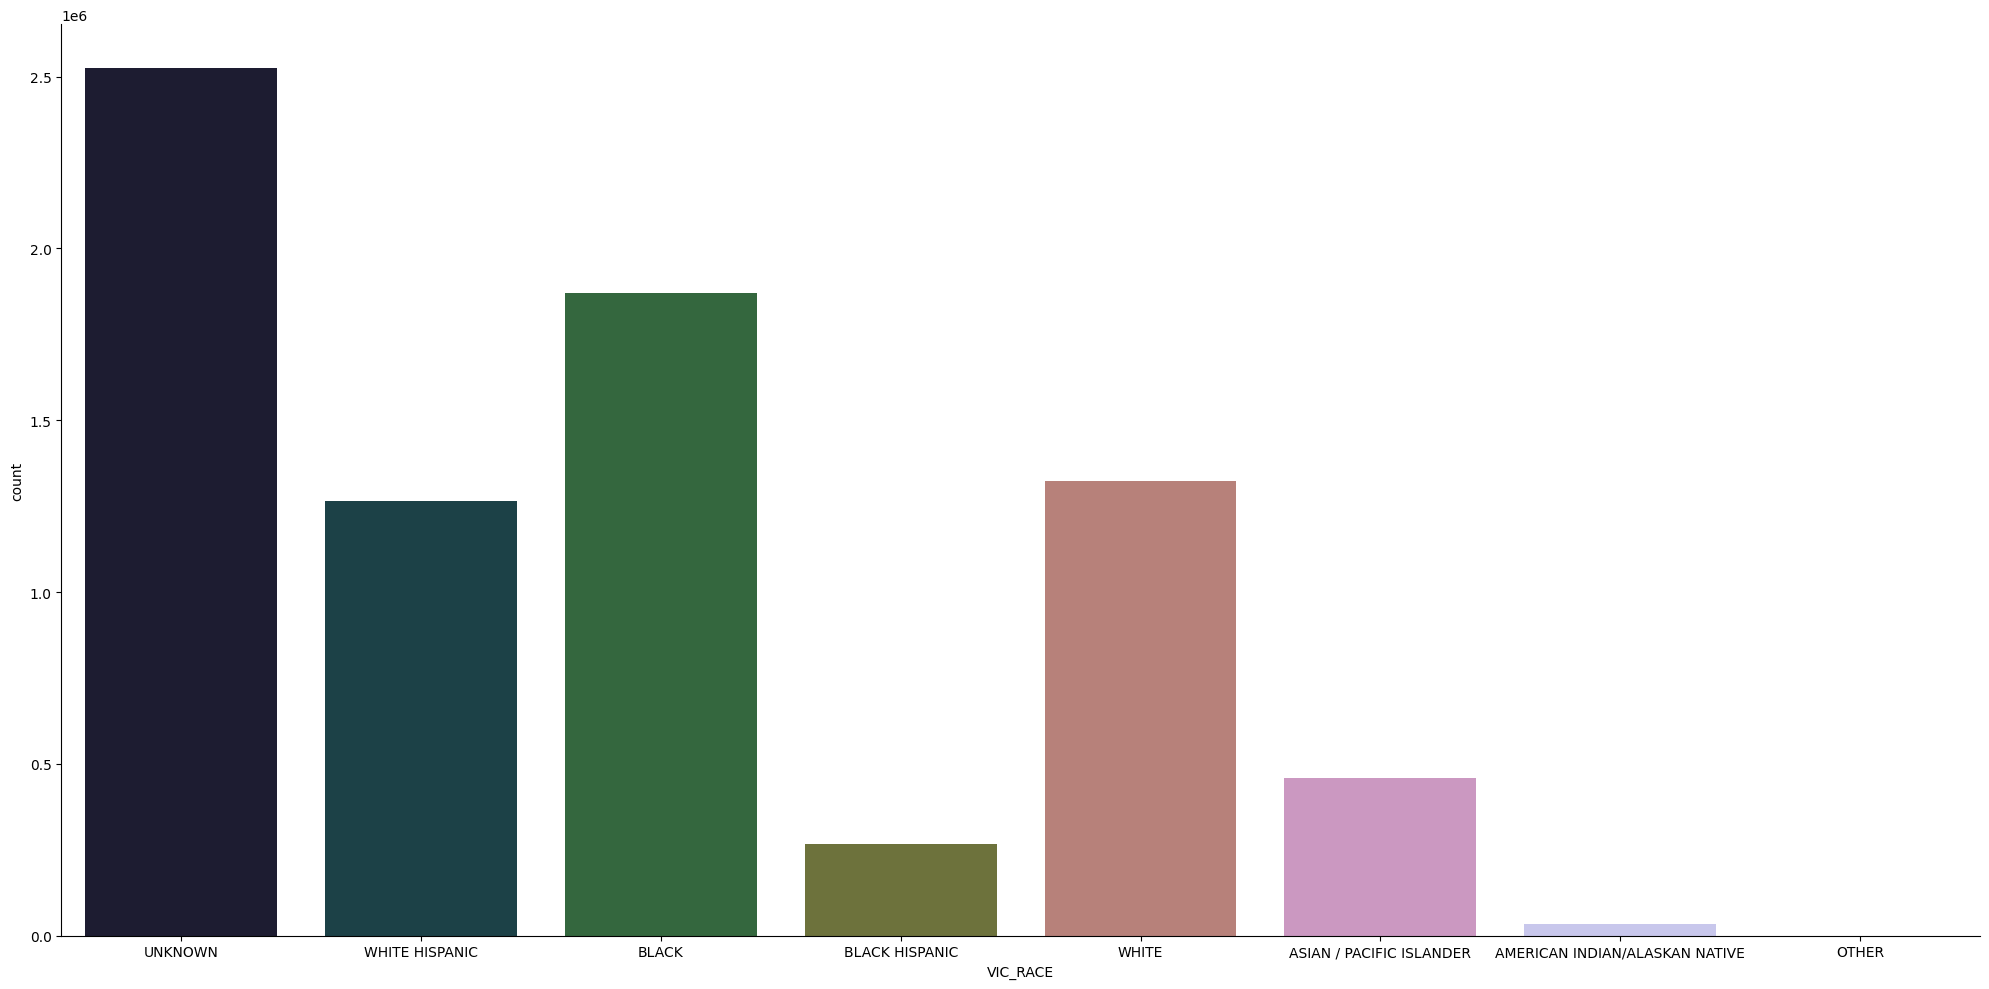

In [33]:
#Number of victims by race

sns.catplot(x="VIC_RACE", data=data,kind="count", palette="cubehelix", height=10, aspect=2);

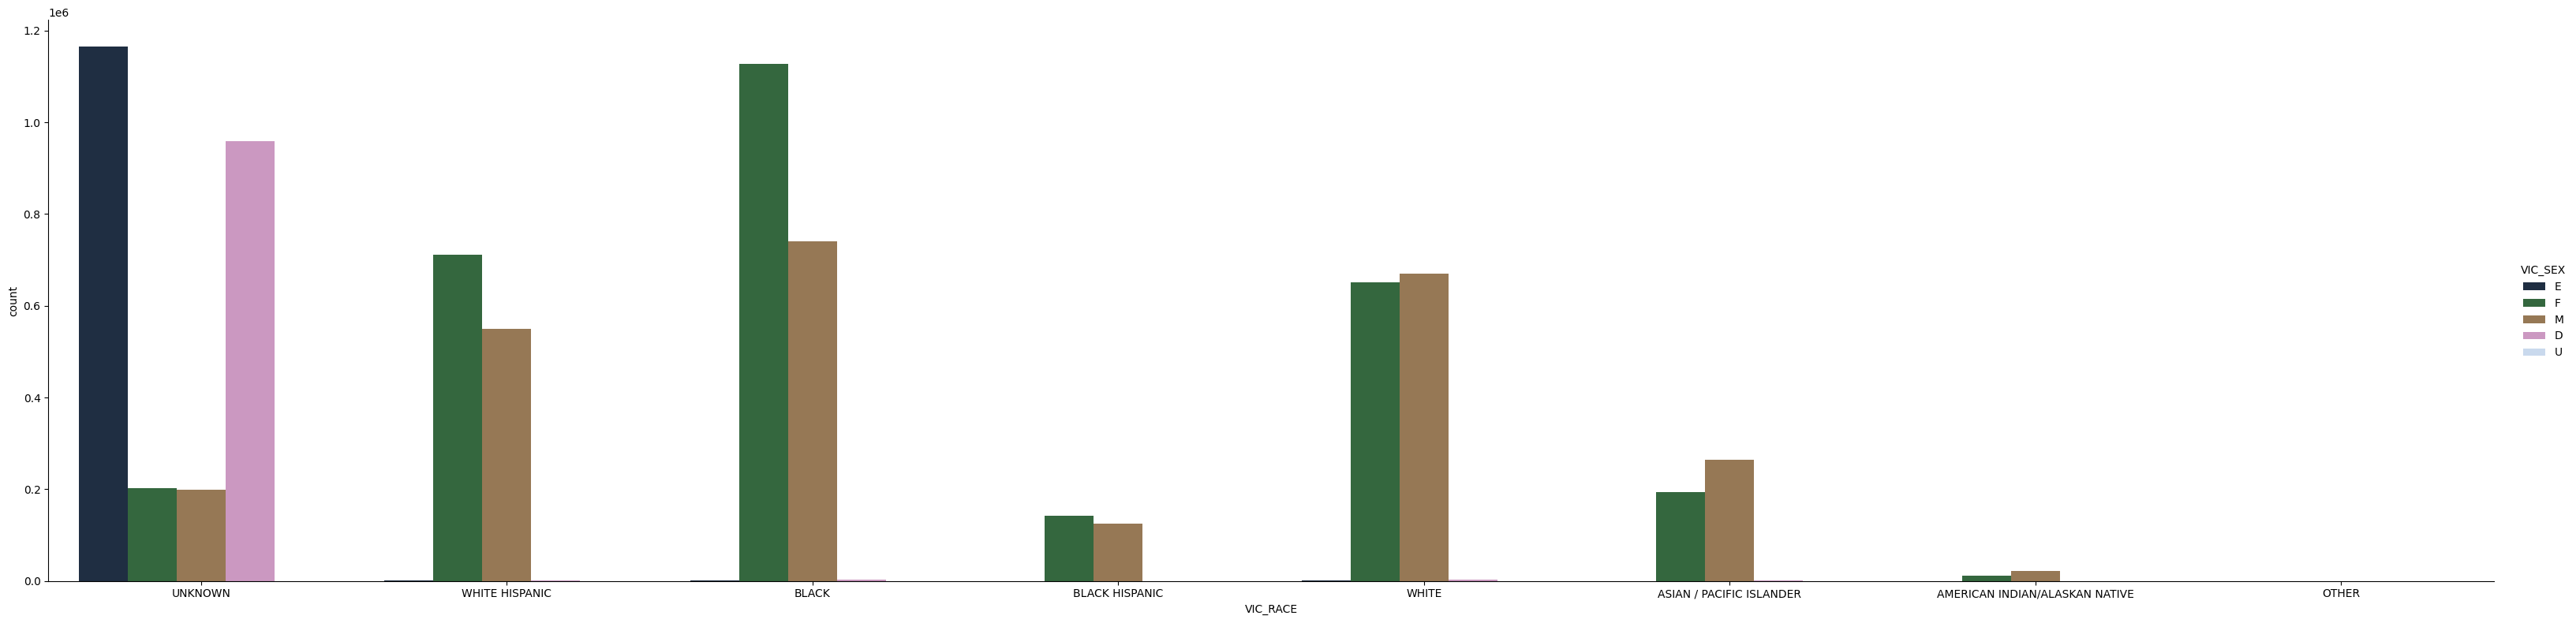

In [34]:
ax = sns.catplot(x="VIC_RACE", hue="VIC_SEX", kind="count",palette="cubehelix", data=data, height=8, aspect=4)


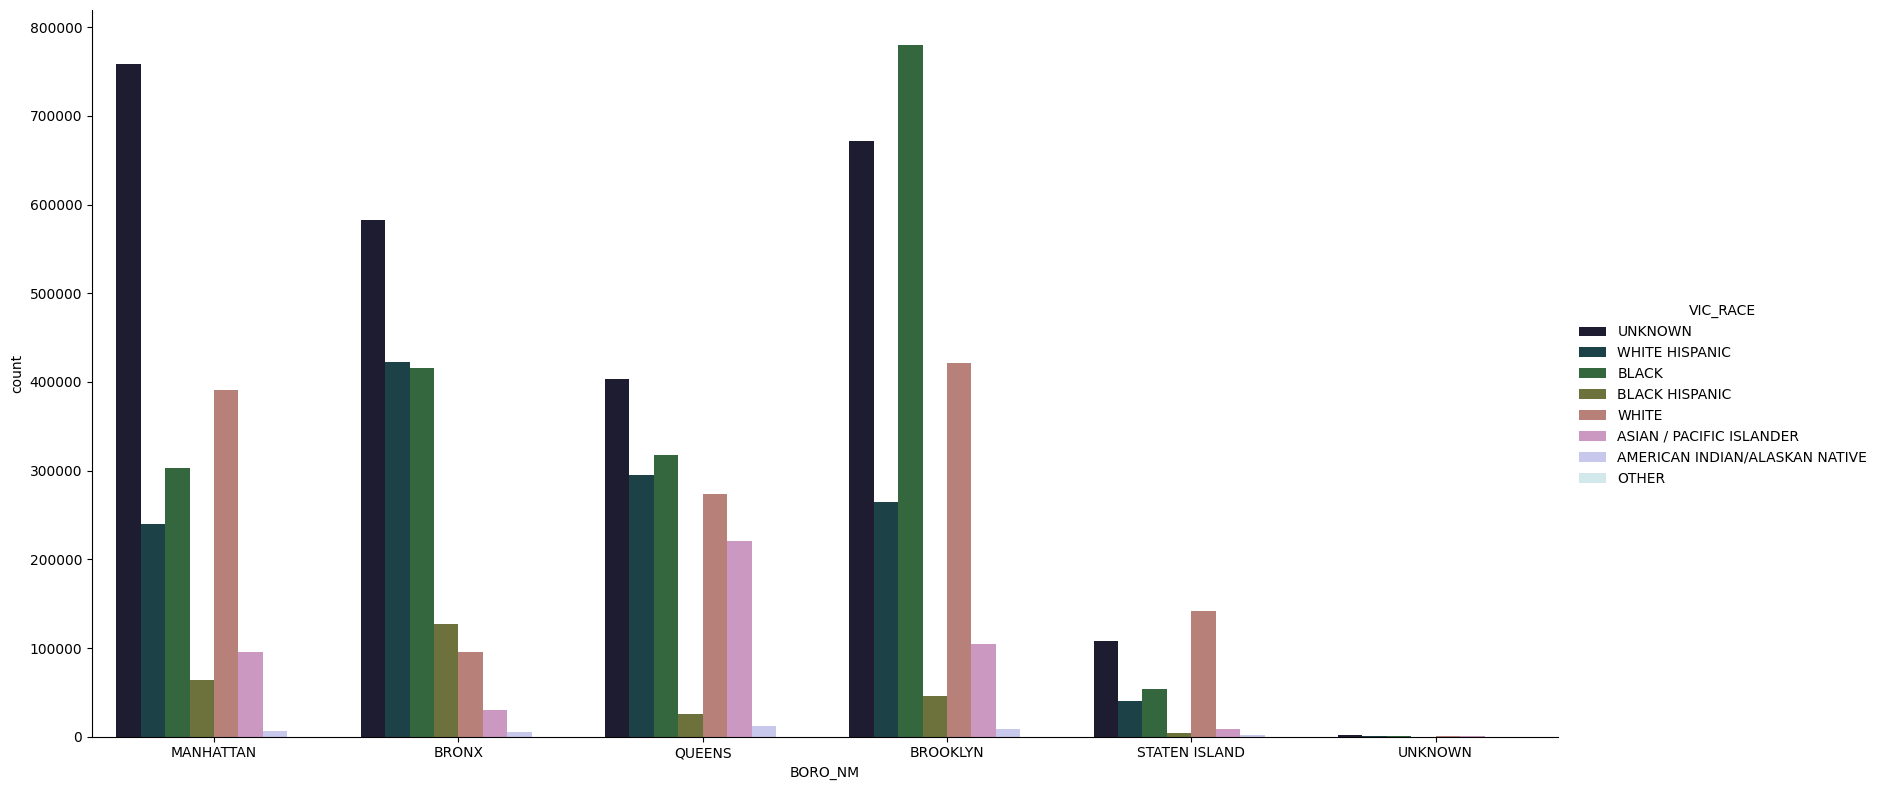

In [35]:
#Number of victims by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="VIC_RACE", kind="count",palette="cubehelix", data=data, height=8, aspect = 2)


**Suspects PLots**

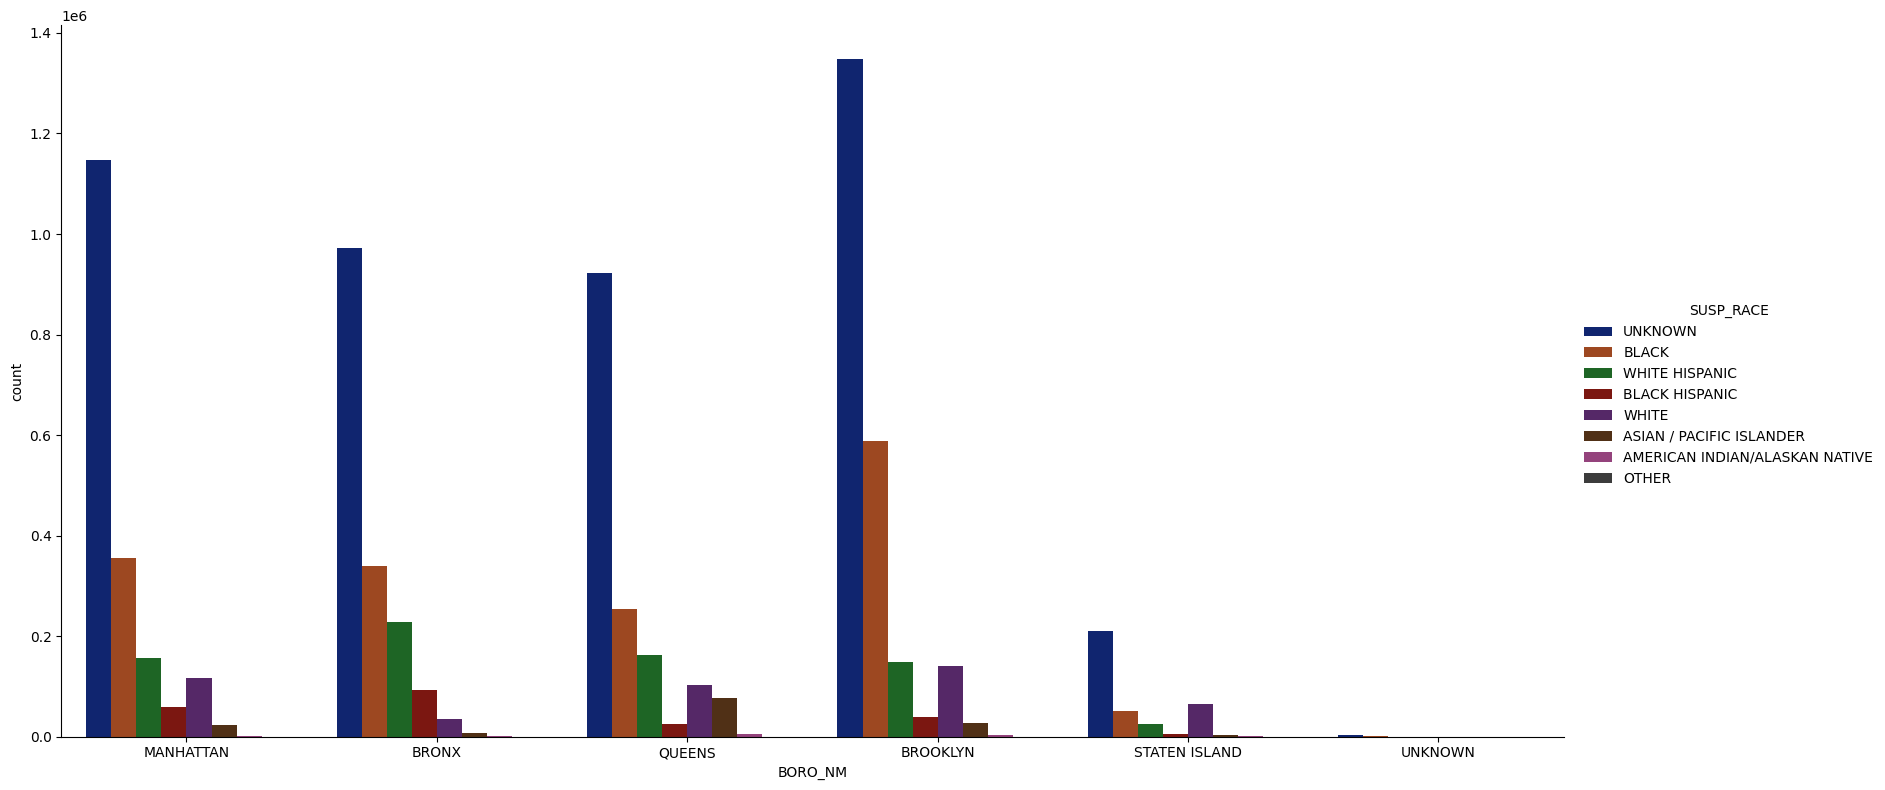

In [36]:
#Number of Suspects by Race in the different boroughs

ax = sns.catplot(x="BORO_NM", hue="SUSP_RACE", kind="count",palette="dark", data=data, height=8, aspect = 2)


<Figure size 1600x800 with 0 Axes>

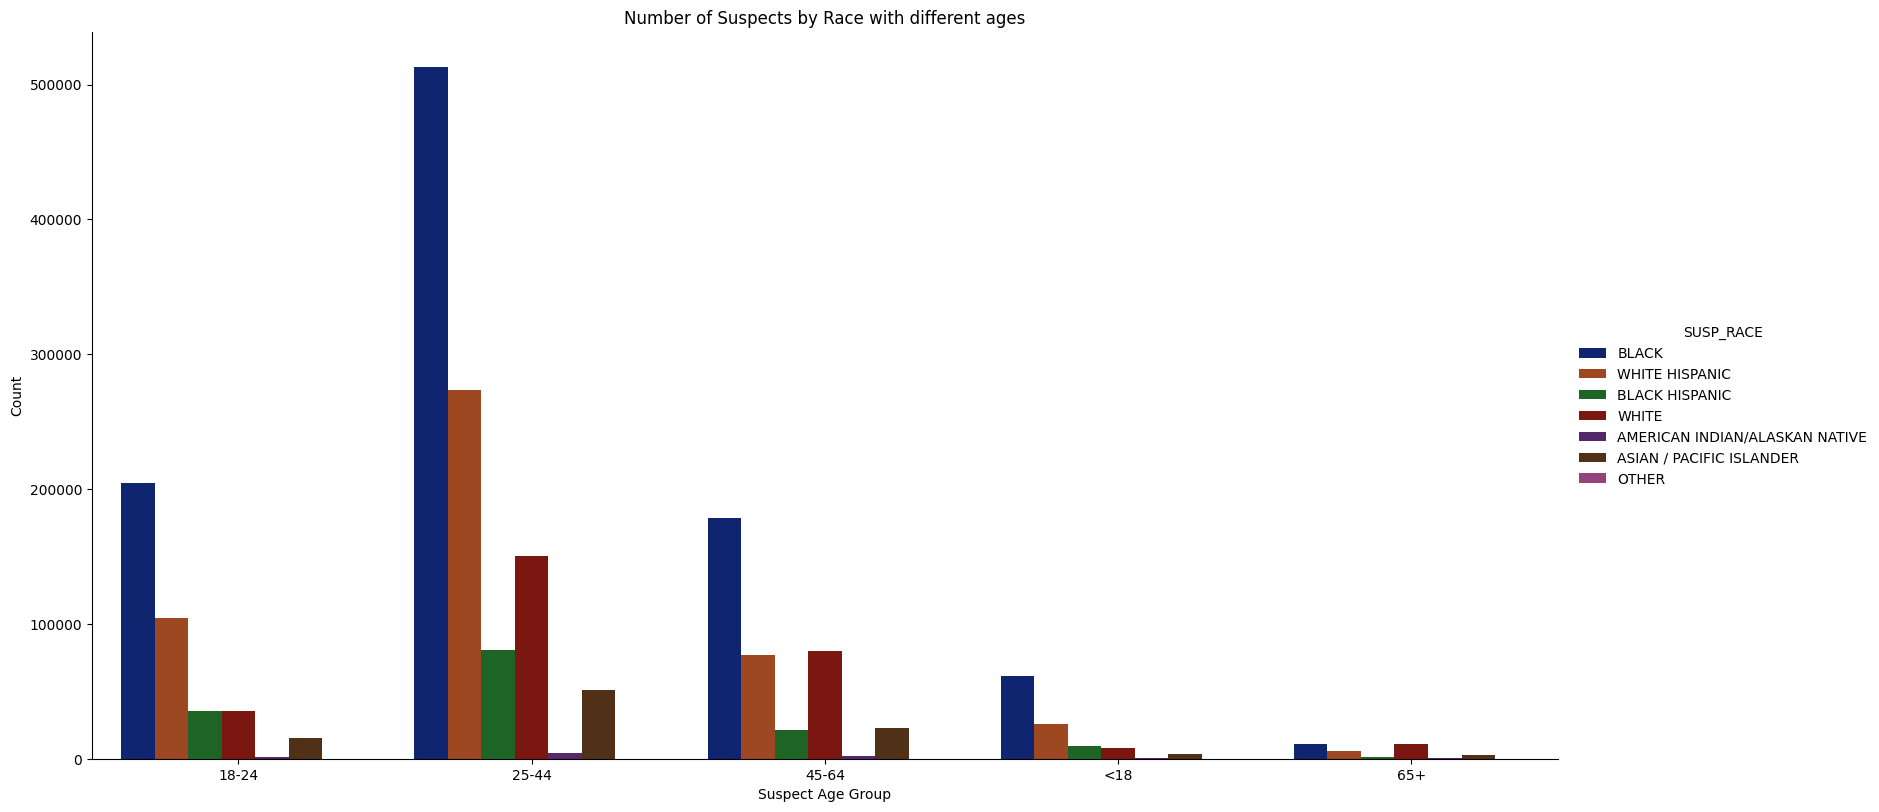

In [37]:
# Filter out rows with SUSP_AGE_GROUP == 'UNKNOWN' or SUSP_RACE == 'UNKNOWN'
filtered_data = data[(data['SUSP_AGE_GROUP'] != 'UNKNOWN') & (data['SUSP_RACE'] != 'UNKNOWN')]

# Number of suspects by Race in the different boroughs
plt.figure(figsize=(16, 8))
ax = sns.catplot(x="SUSP_AGE_GROUP", hue="SUSP_RACE", kind="count", palette="dark", data=filtered_data, height=8, aspect=2)

# Set plot labels and title
ax.set_axis_labels("Suspect Age Group", "Count")
ax.set(title="Number of Suspects by Race with different ages")

# Show the plot
plt.show()


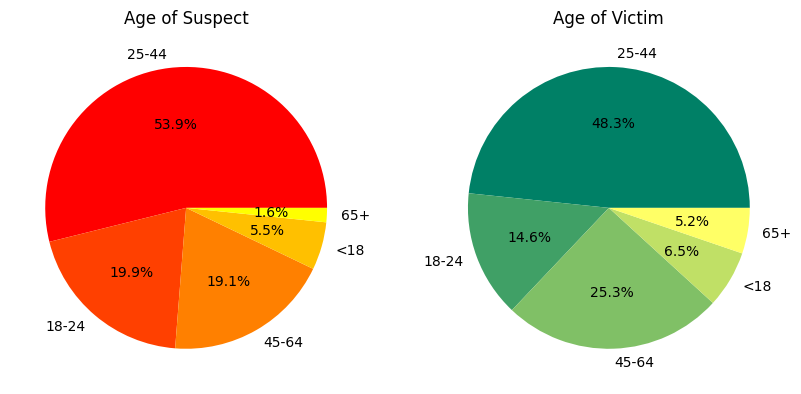

In [48]:
filtered_data_susp = data[data['SUSP_AGE_GROUP'] != 'UNKNOWN']
filtered_data_vic = data[data['VIC_AGE_GROUP'] != 'UNKNOWN']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Age of suspect
filtered_data_susp['SUSP_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Suspect',
                                                                   colormap='autumn', autopct='%1.1f%%', ylabel='', ax=axs[0])

# Plot for Age of victim
filtered_data_vic['VIC_AGE_GROUP'].value_counts(sort=False).plot(kind='pie', title='Age of Victim',
                                                                 colormap='summer', autopct='%1.1f%%', ylabel='', ax=axs[1])

plt.show()

**Crimes Plots**

Text(0.5, 1.0, 'crime success rate')

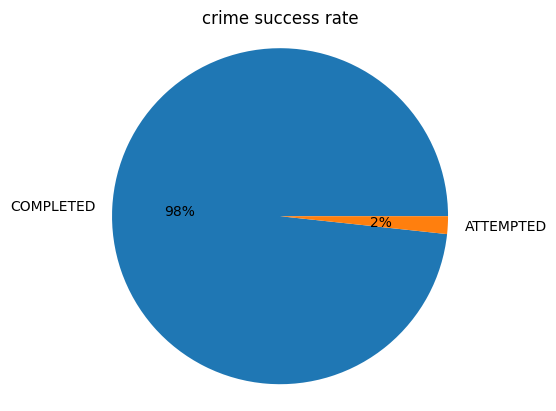

In [39]:
# Successful crime rate
plt.pie(data['COMPLETED'].value_counts(normalize=True).round(4),labels=data['COMPLETED'].unique(),autopct='%.0f%%')
plt.axis('equal')
plt.title('crime success rate')

array([<Axes: ylabel='count'>], dtype=object)

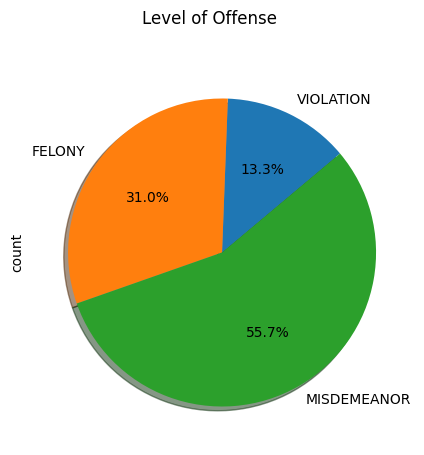

In [40]:
data['CRIME_CLASS'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

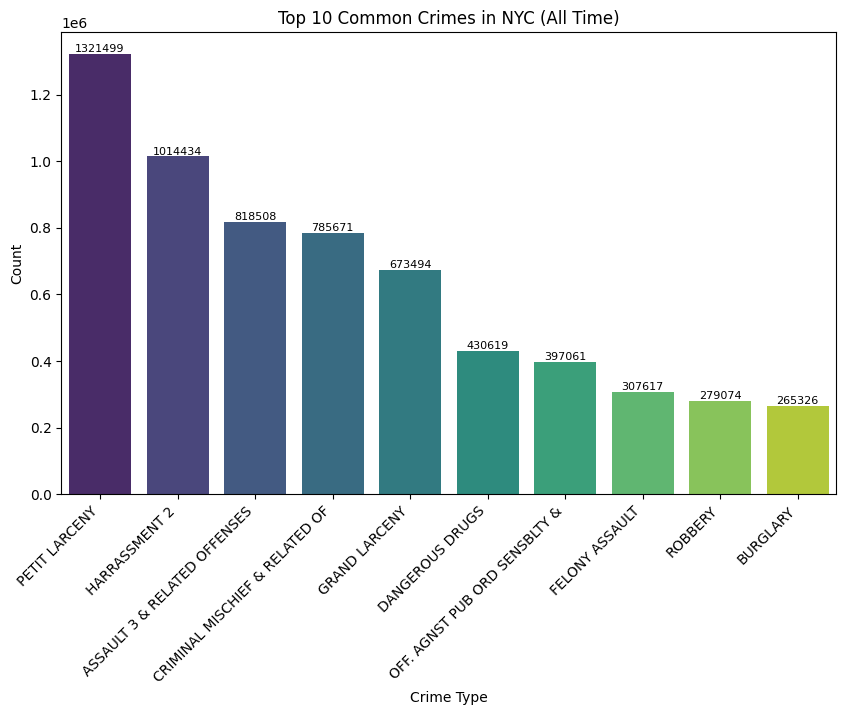

In [41]:
# Get the top 10 common crimes
top_crimes = data['OFNS_DESC'].value_counts()[:10]

# Plotting with Seaborn for better aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="viridis")

# Adding labels and title
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Top 10 Common Crimes in NYC (All Time)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Adding count values on top of each bar
for i, value in enumerate(top_crimes.values):
    plt.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=8, color='black')

# Show the plot
plt.show()

**Locations of the Occurred Crimes**

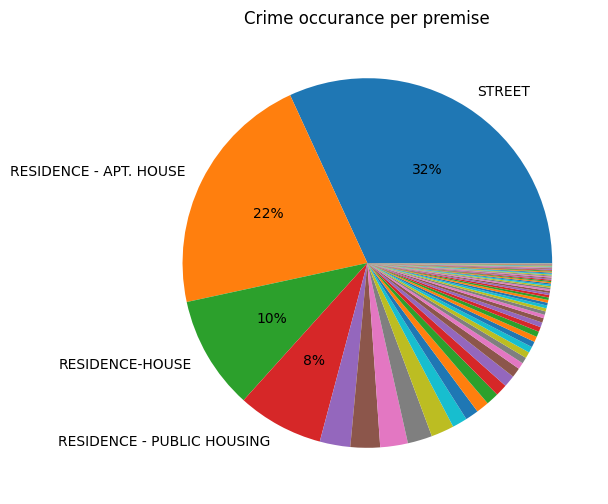

In [42]:
# Crime premise occurance
# Cutoff percentage for display
pct_cutoff=5
fig= plt.figure(figsize=(15,6))

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


df_temp=data['PREM_TYP_DESC'].value_counts(normalize=True).round(8)

# Define lables to go with the pie plot
labels = [n if v > pct_cutoff/100 else ''
          for n, v in zip(df_temp.index, df_temp)] 

# Generate the pie plot
plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=False)

# Set axis,label and title

plt.title('Crime occurance per premise')

plt.show()

**HEATMAP FROM NYC**

In [43]:
#Creation of Heatmap

# Combine Latitude and Longitude into positions
positions = list(zip(data['Latitude'], data['Longitude']))

# Choose the map tiles (e.g., 'Stamen Terrain')
tiles = 'Stamen Terrain'

# Create a Folium Map with attribution
heatmap_map = folium.Map(
    location=[40.75, -73.98],
    zoom_start=10,
    control_scale=True  # This adds a scale to the map
)

# Add a base map layer
TileLayer(tiles=tiles, attr="Map data © Stamen Design, OpenStreetMap contributors").add_to(heatmap_map)

# Sample a subset of positions (e.g., 22,000 points)
sampled_positions = sample(positions, 22000)

# Add HeatMap layer to the Folium Map
HeatMap(sampled_positions, radius=8).add_to(heatmap_map)

# Display the Folium Map
heatmap_map

**WHEN the incidents had happened**

Text(0.5, 1.0, 'Crimes per month')

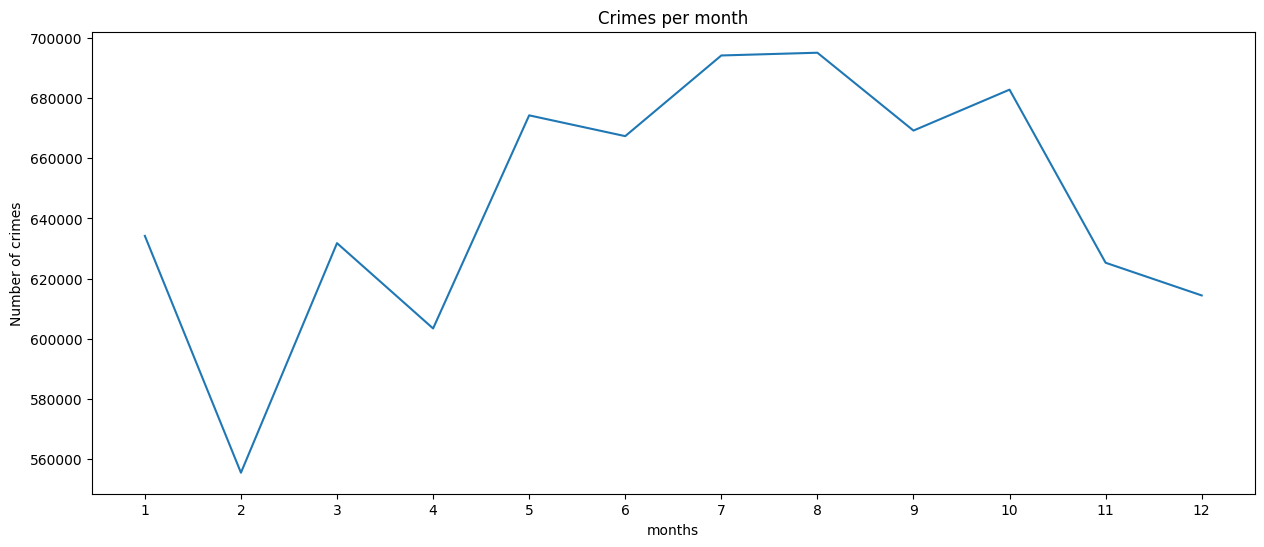

In [44]:
# Crime distribution per month
fig= plt.figure(figsize=(15,6))
data.groupby('month').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('months')
plt.xticks([x for x in range(1,13)])
plt.ylabel('Number of crimes')
plt.title('Crimes per month')

Text(0.5, 1.0, 'Crimes per week days')

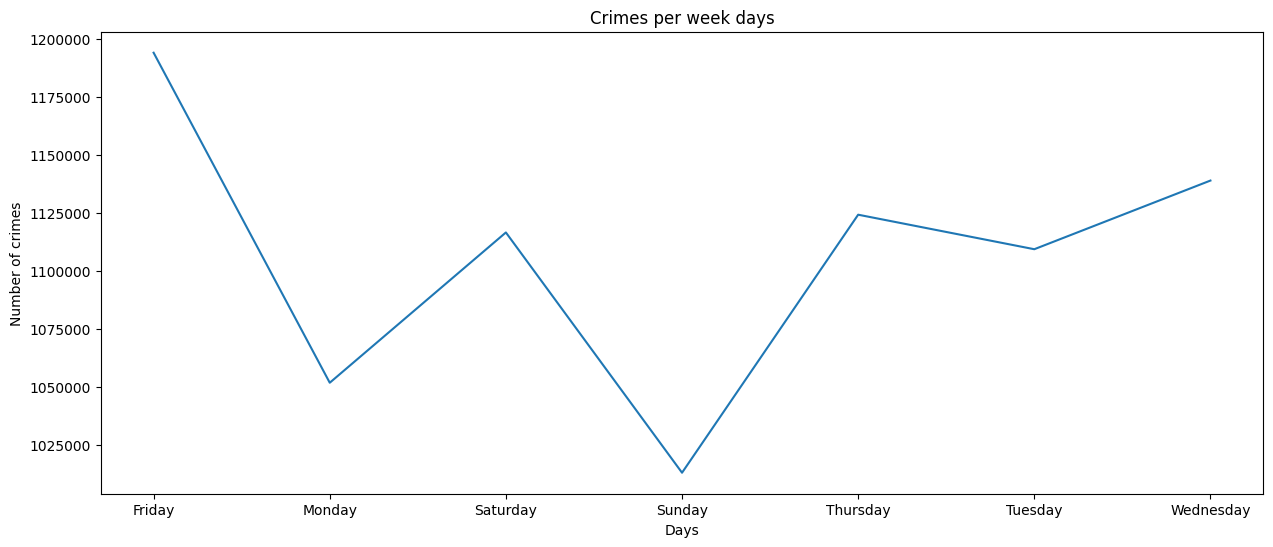

In [45]:
# Crime distribution per week days
fig= plt.figure(figsize=(15,6))
data.groupby('weekday').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('Days')
plt.xticks([x for x in range(7)])
plt.ylabel('Number of crimes')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Crimes per week days')

Text(0.5, 1.0, 'Crimes per hour')

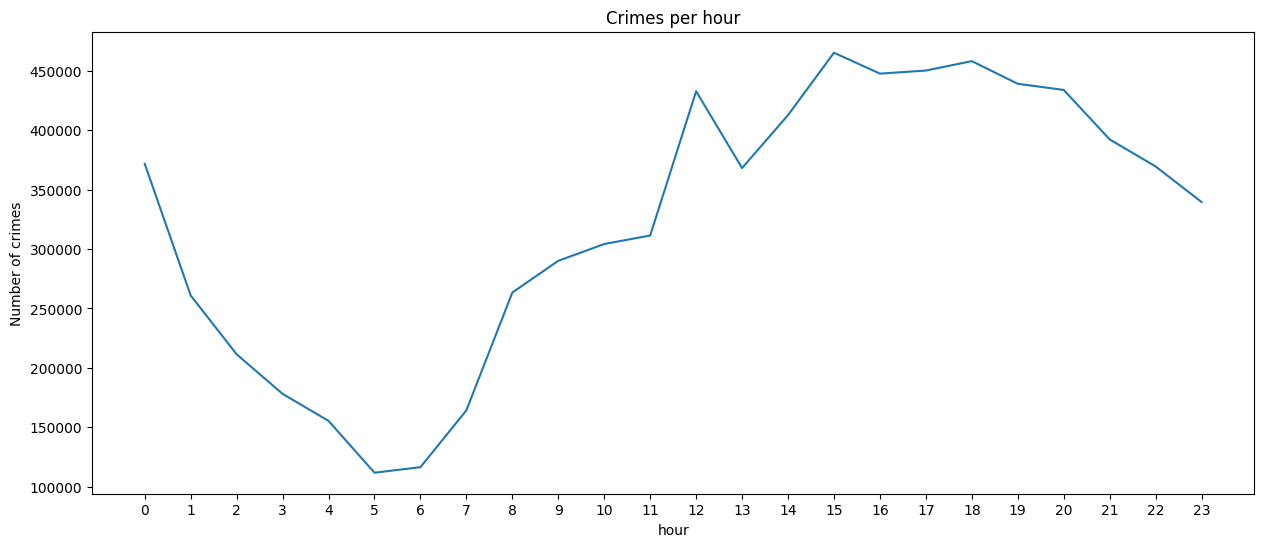

In [46]:
# Crime distribution per hour
fig= plt.figure(figsize=(15,6))
data.groupby('hour').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('hour')
plt.xticks([x for x in range(24)])
plt.ylabel('Number of crimes')
plt.title('Crimes per hour')

**Crimes evolution in last years**

Text(0.5, 1.0, 'Crime evolution')

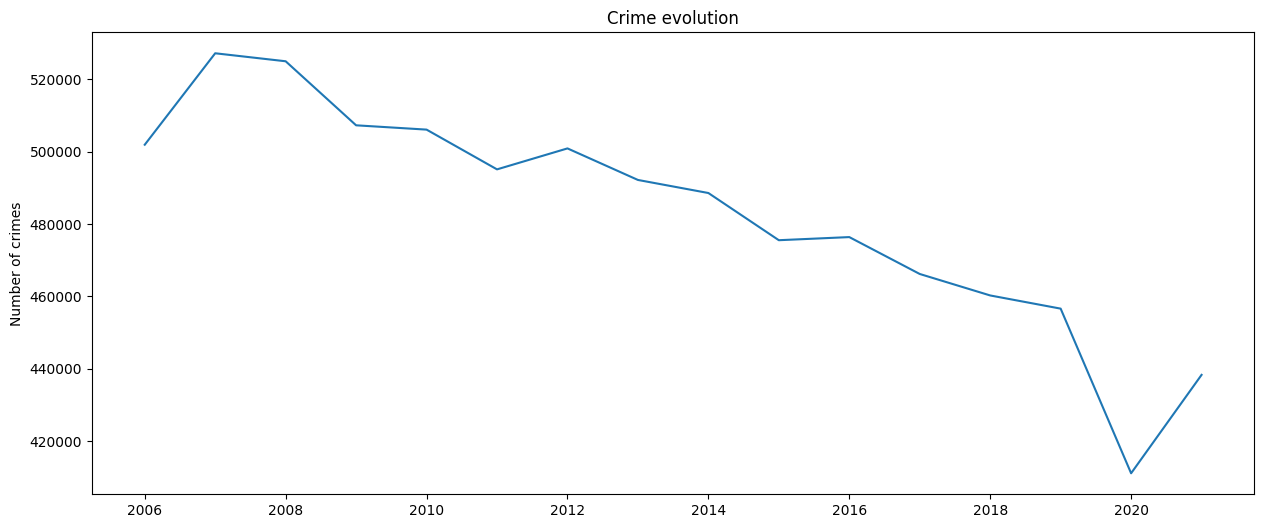

In [47]:
# Crime distribution per year
fig= plt.figure(figsize=(15,6))
temp_df = data[data["year"]>2005]
temp_df.groupby('year').count()["CMPLNT_NUM"].plot(kind='line')
plt.xlabel('')
plt.ylabel('Number of crimes')
plt.title('Crime evolution')